# Laguerre Polynomials

## Introduction

Laguerre polynomials are a family of orthogonal polynomials that arise naturally in quantum mechanics, particularly in the solution of the radial part of the Schrödinger equation for the hydrogen atom. Named after the French mathematician Edmond Laguerre (1834-1886), these polynomials have profound applications in mathematical physics, numerical analysis, and signal processing.

## Mathematical Definition

### Standard Laguerre Polynomials

The Laguerre polynomials $L_n(x)$ can be defined through several equivalent representations:

**Rodrigues' Formula:**
$$L_n(x) = \frac{e^x}{n!} \frac{d^n}{dx^n}\left(e^{-x} x^n\right)$$

**Explicit Formula:**
$$L_n(x) = \sum_{k=0}^{n} \binom{n}{k} \frac{(-1)^k}{k!} x^k$$

**Generating Function:**
$$\frac{e^{-xt/(1-t)}}{1-t} = \sum_{n=0}^{\infty} L_n(x) t^n, \quad |t| < 1$$

### Associated Laguerre Polynomials

The associated (or generalized) Laguerre polynomials $L_n^{(\alpha)}(x)$ are defined as:

$$L_n^{(\alpha)}(x) = \frac{x^{-\alpha} e^x}{n!} \frac{d^n}{dx^n}\left(e^{-x} x^{n+\alpha}\right)$$

Or equivalently:
$$L_n^{(\alpha)}(x) = \sum_{k=0}^{n} (-1)^k \binom{n+\alpha}{n-k} \frac{x^k}{k!}$$

Note that $L_n(x) = L_n^{(0)}(x)$.

## Key Properties

### Orthogonality

Laguerre polynomials satisfy the orthogonality relation with weight function $w(x) = e^{-x}$ on $[0, \infty)$:

$$\int_0^{\infty} e^{-x} L_m(x) L_n(x) \, dx = \delta_{mn}$$

For associated Laguerre polynomials with weight $w(x) = x^\alpha e^{-x}$:

$$\int_0^{\infty} x^\alpha e^{-x} L_m^{(\alpha)}(x) L_n^{(\alpha)}(x) \, dx = \frac{\Gamma(n+\alpha+1)}{n!} \delta_{mn}$$

### Recurrence Relation

$$(n+1)L_{n+1}(x) = (2n+1-x)L_n(x) - nL_{n-1}(x)$$

### Differential Equation

Laguerre polynomials satisfy the differential equation:

$$x \frac{d^2 L_n}{dx^2} + (1-x) \frac{dL_n}{dx} + nL_n = 0$$

## First Few Laguerre Polynomials

| $n$ | $L_n(x)$ |
|-----|----------|
| 0 | $1$ |
| 1 | $1 - x$ |
| 2 | $1 - 2x + \frac{x^2}{2}$ |
| 3 | $1 - 3x + \frac{3x^2}{2} - \frac{x^3}{6}$ |
| 4 | $1 - 4x + 3x^2 - \frac{2x^3}{3} + \frac{x^4}{24}$ |

## Computational Implementation

We now implement the computation and visualization of Laguerre polynomials using Python's scientific computing stack.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_laguerre, eval_genlaguerre, factorial
from scipy.integrate import quad

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

### Computing Laguerre Polynomials

We'll implement two methods: using SciPy's built-in functions and our own implementation using the recurrence relation.

In [2]:
def laguerre_recurrence(n, x):
    """
    Compute Laguerre polynomial L_n(x) using the recurrence relation.
    
    (n+1)L_{n+1}(x) = (2n+1-x)L_n(x) - n*L_{n-1}(x)
    
    Parameters:
    -----------
    n : int
        Degree of the polynomial
    x : array_like
        Points at which to evaluate the polynomial
        
    Returns:
    --------
    L_n : ndarray
        Values of L_n(x)
    """
    x = np.asarray(x, dtype=float)
    
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return 1 - x
    
    L_prev = np.ones_like(x)  # L_0
    L_curr = 1 - x            # L_1
    
    for k in range(1, n):
        L_next = ((2*k + 1 - x) * L_curr - k * L_prev) / (k + 1)
        L_prev = L_curr
        L_curr = L_next
    
    return L_curr


def laguerre_explicit(n, x):
    """
    Compute Laguerre polynomial using the explicit formula.
    
    L_n(x) = sum_{k=0}^{n} C(n,k) * (-1)^k / k! * x^k
    """
    x = np.asarray(x, dtype=float)
    result = np.zeros_like(x)
    
    for k in range(n + 1):
        coeff = ((-1)**k * factorial(n, exact=True) / 
                 (factorial(k, exact=True)**2 * factorial(n-k, exact=True)))
        result += coeff * x**k
    
    return result


# Verify our implementations match SciPy
x_test = np.linspace(0, 10, 100)
n_test = 5

scipy_result = eval_laguerre(n_test, x_test)
recurrence_result = laguerre_recurrence(n_test, x_test)
explicit_result = laguerre_explicit(n_test, x_test)

print(f"Max difference (recurrence vs SciPy): {np.max(np.abs(recurrence_result - scipy_result)):.2e}")
print(f"Max difference (explicit vs SciPy): {np.max(np.abs(explicit_result - scipy_result)):.2e}")

Max difference (recurrence vs SciPy): 2.13e-14
Max difference (explicit vs SciPy): 3.23e-13


### Visualization of Laguerre Polynomials

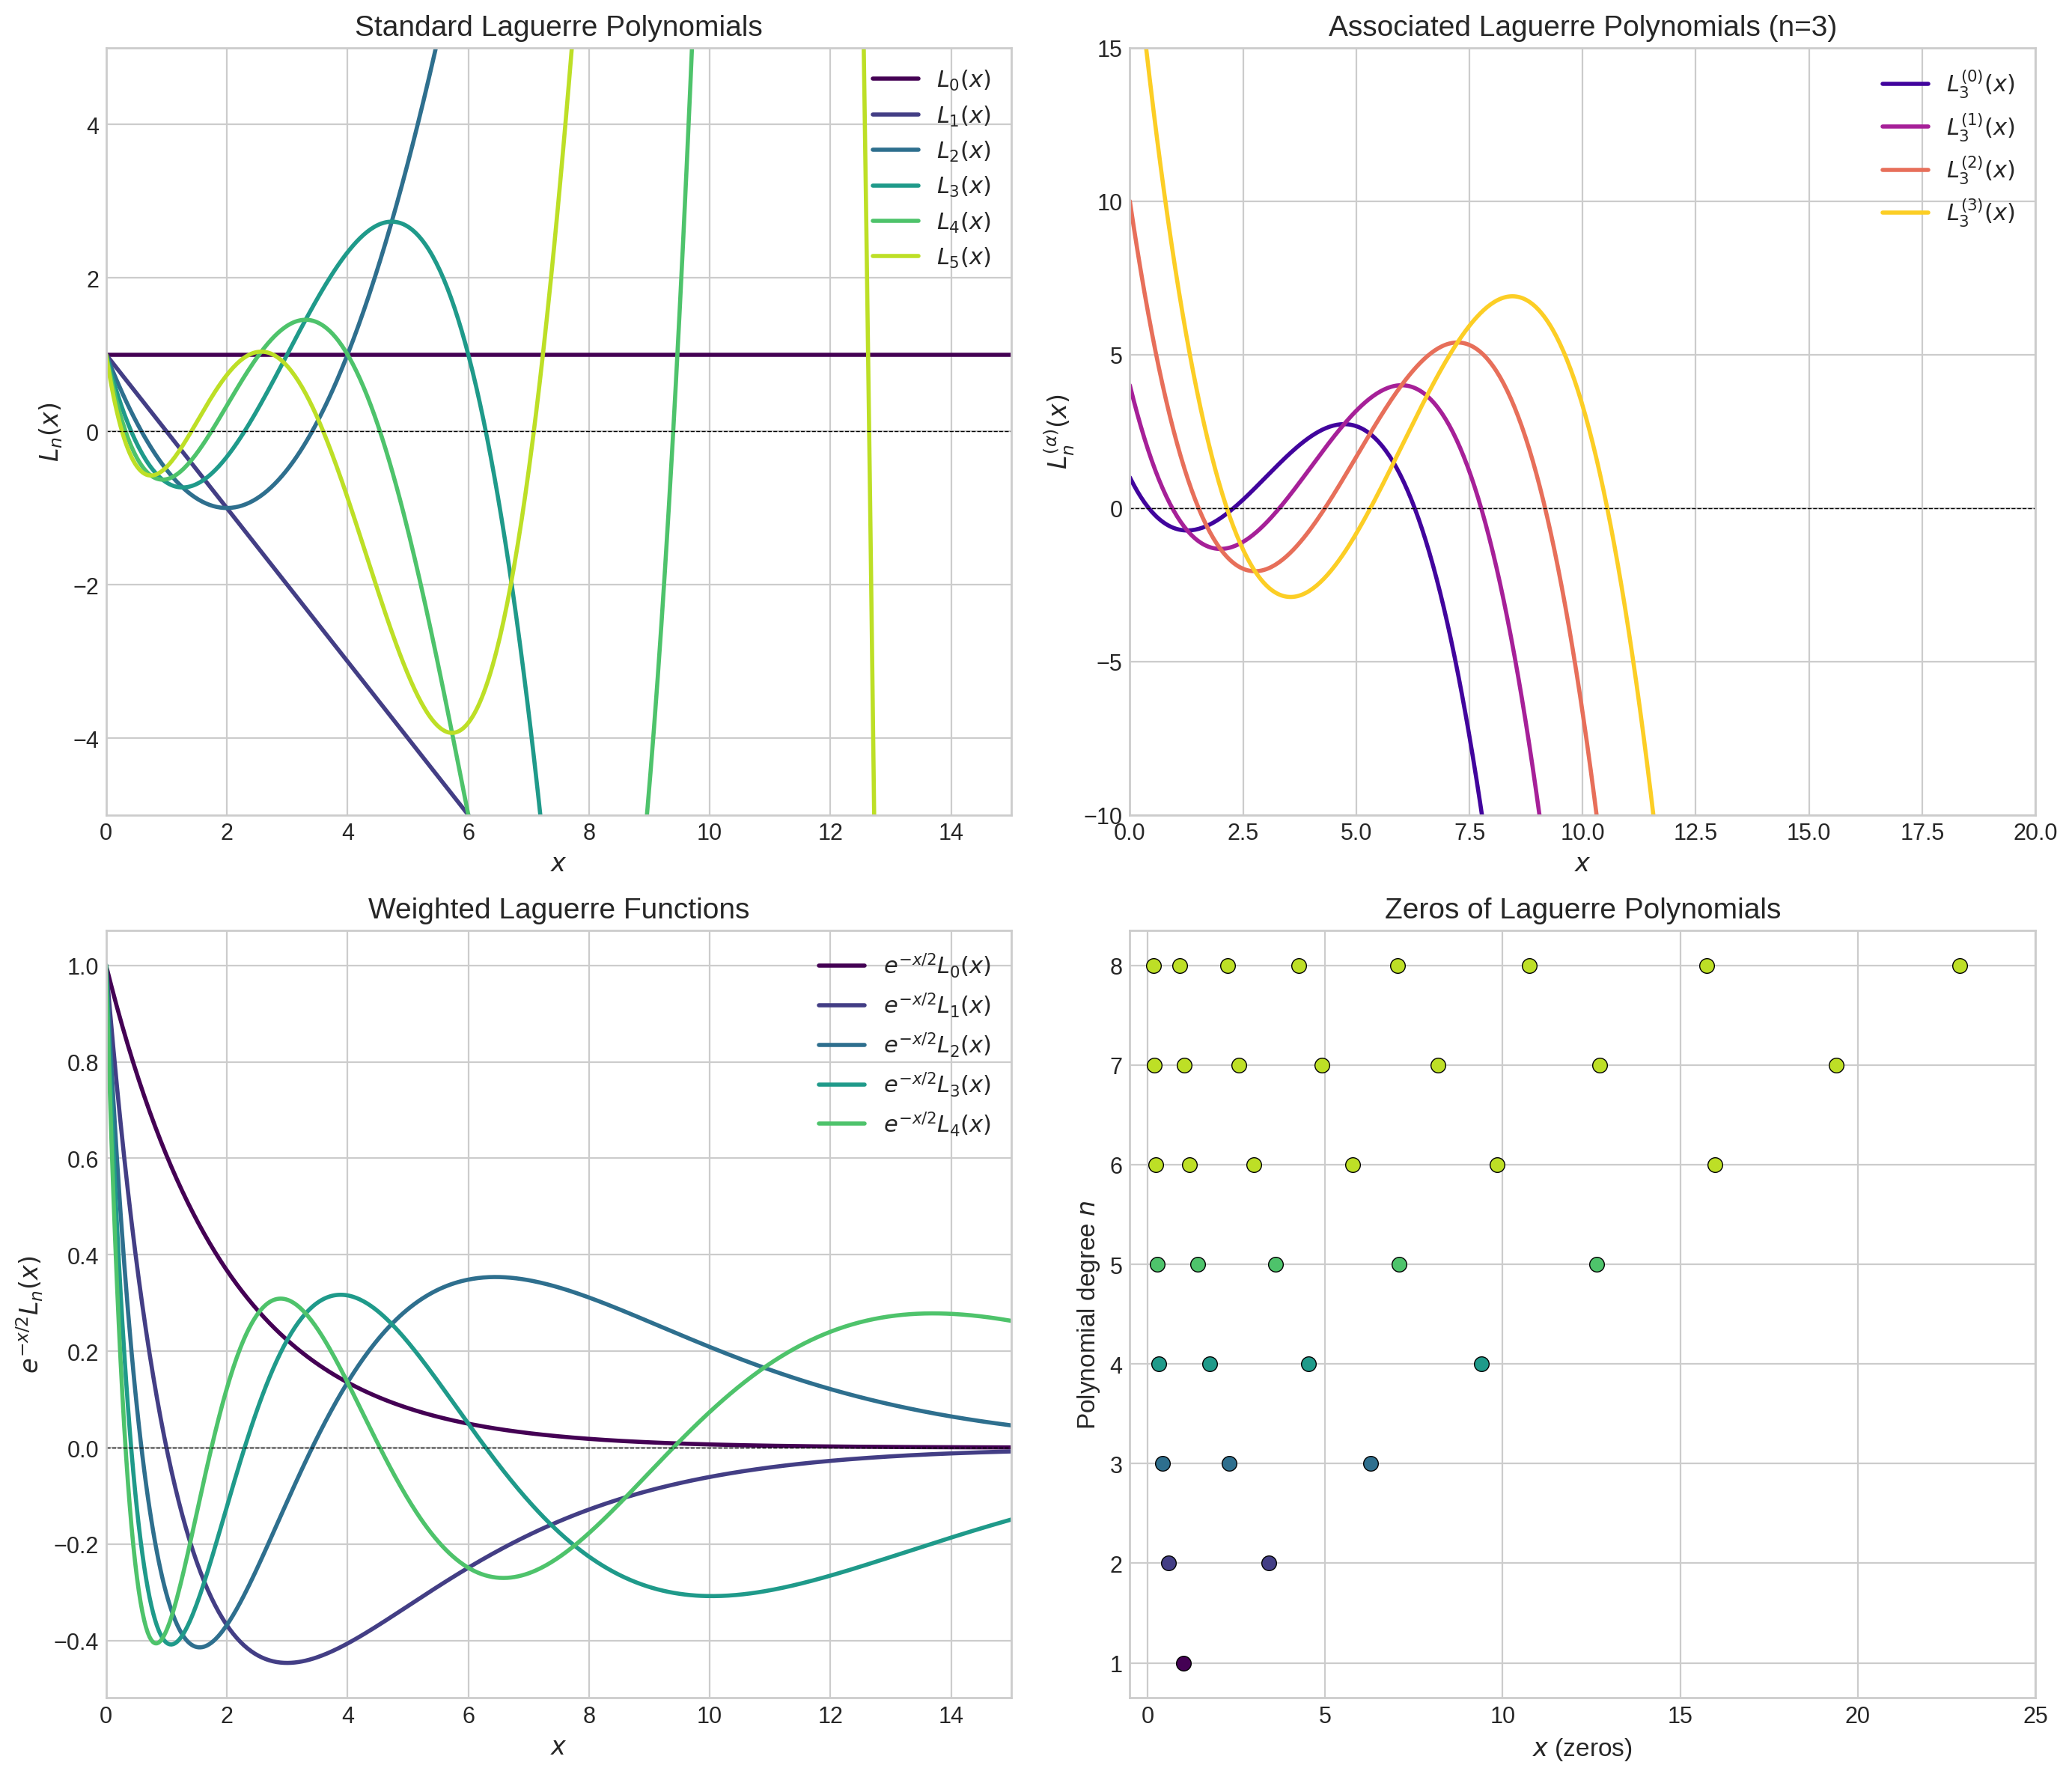


Plot saved to 'plot.png'


In [3]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Standard Laguerre Polynomials L_n(x)
ax1 = axes[0, 0]
x = np.linspace(0, 15, 500)
colors = plt.cm.viridis(np.linspace(0, 0.9, 6))

for n in range(6):
    y = eval_laguerre(n, x)
    ax1.plot(x, y, label=f'$L_{n}(x)$', color=colors[n], linewidth=2)

ax1.axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$L_n(x)$')
ax1.set_title('Standard Laguerre Polynomials')
ax1.legend(loc='upper right')
ax1.set_ylim(-5, 5)
ax1.set_xlim(0, 15)

# Plot 2: Associated Laguerre Polynomials L_n^(alpha)(x)
ax2 = axes[0, 1]
x = np.linspace(0, 20, 500)
n = 3
alphas = [0, 1, 2, 3]
colors2 = plt.cm.plasma(np.linspace(0.1, 0.9, len(alphas)))

for i, alpha in enumerate(alphas):
    y = eval_genlaguerre(n, alpha, x)
    ax2.plot(x, y, label=f'$L_{n}^{{({alpha})}}(x)$', color=colors2[i], linewidth=2)

ax2.axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$L_n^{(\\alpha)}(x)$')
ax2.set_title(f'Associated Laguerre Polynomials (n={n})')
ax2.legend(loc='upper right')
ax2.set_ylim(-10, 15)
ax2.set_xlim(0, 20)

# Plot 3: Weighted Laguerre functions (showing orthogonality weight)
ax3 = axes[1, 0]
x = np.linspace(0, 15, 500)
weight = np.exp(-x/2)  # sqrt of weight function for visualization

for n in range(5):
    y = weight * eval_laguerre(n, x)
    ax3.plot(x, y, label=f'$e^{{-x/2}}L_{n}(x)$', color=colors[n], linewidth=2)

ax3.axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax3.set_xlabel('$x$')
ax3.set_ylabel('$e^{-x/2}L_n(x)$')
ax3.set_title('Weighted Laguerre Functions')
ax3.legend(loc='upper right')
ax3.set_xlim(0, 15)

# Plot 4: Zeros of Laguerre Polynomials
ax4 = axes[1, 1]

# Find zeros numerically
from numpy.polynomial.laguerre import lagroots

max_n = 8
for n in range(1, max_n + 1):
    # Coefficients in standard form
    coeffs = np.zeros(n + 1)
    for k in range(n + 1):
        coeffs[k] = ((-1)**k * factorial(n, exact=True) / 
                     (factorial(k, exact=True)**2 * factorial(n-k, exact=True)))
    
    # Find roots
    roots = np.roots(coeffs[::-1])
    roots = np.real(roots[np.isreal(roots)])
    roots = np.sort(roots)
    
    ax4.scatter(roots, [n]*len(roots), s=50, c=[colors[min(n-1, 5)]], 
                edgecolors='black', linewidth=0.5)

ax4.set_xlabel('$x$ (zeros)')
ax4.set_ylabel('Polynomial degree $n$')
ax4.set_title('Zeros of Laguerre Polynomials')
ax4.set_yticks(range(1, max_n + 1))
ax4.set_xlim(-0.5, 25)

plt.tight_layout()
plt.savefig('laguerre_polynomials_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Verification of Orthogonality

Let's numerically verify the orthogonality relation:
$$\int_0^{\infty} e^{-x} L_m(x) L_n(x) \, dx = \delta_{mn}$$

In [4]:
def orthogonality_integral(m, n):
    """
    Compute the orthogonality integral for Laguerre polynomials.
    """
    def integrand(x):
        return np.exp(-x) * eval_laguerre(m, x) * eval_laguerre(n, x)
    
    result, error = quad(integrand, 0, np.inf)
    return result

# Compute orthogonality matrix
N = 5
ortho_matrix = np.zeros((N, N))

print("Orthogonality Matrix (should be identity):")
print("=" * 50)

for m in range(N):
    for n in range(N):
        ortho_matrix[m, n] = orthogonality_integral(m, n)

# Display with formatting
print("\n     ", end="")
for n in range(N):
    print(f"  L_{n}   ", end="")
print("\n")

for m in range(N):
    print(f"L_{m}  ", end="")
    for n in range(N):
        print(f"{ortho_matrix[m, n]:7.4f} ", end="")
    print()

print("\n" + "=" * 50)
print(f"Max deviation from identity: {np.max(np.abs(ortho_matrix - np.eye(N))):.2e}")

Orthogonality Matrix (should be identity):

       L_0     L_1     L_2     L_3     L_4   

L_0   1.0000  0.0000 -0.0000  0.0000  0.0000 
L_1   0.0000  1.0000  0.0000  0.0000 -0.0000 
L_2  -0.0000  0.0000  1.0000 -0.0000 -0.0000 
L_3   0.0000  0.0000 -0.0000  1.0000  0.0000 
L_4   0.0000 -0.0000 -0.0000  0.0000  1.0000 

Max deviation from identity: 2.41e-16


## Application: Hydrogen Atom Radial Wave Functions

One of the most important applications of Laguerre polynomials is in quantum mechanics. The radial wave functions of the hydrogen atom are expressed in terms of associated Laguerre polynomials:

$$R_{nl}(r) = \sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]^3}} e^{-\rho/2} \rho^l L_{n-l-1}^{(2l+1)}(\rho)$$

where $\rho = \frac{2r}{na_0}$ and $a_0$ is the Bohr radius.

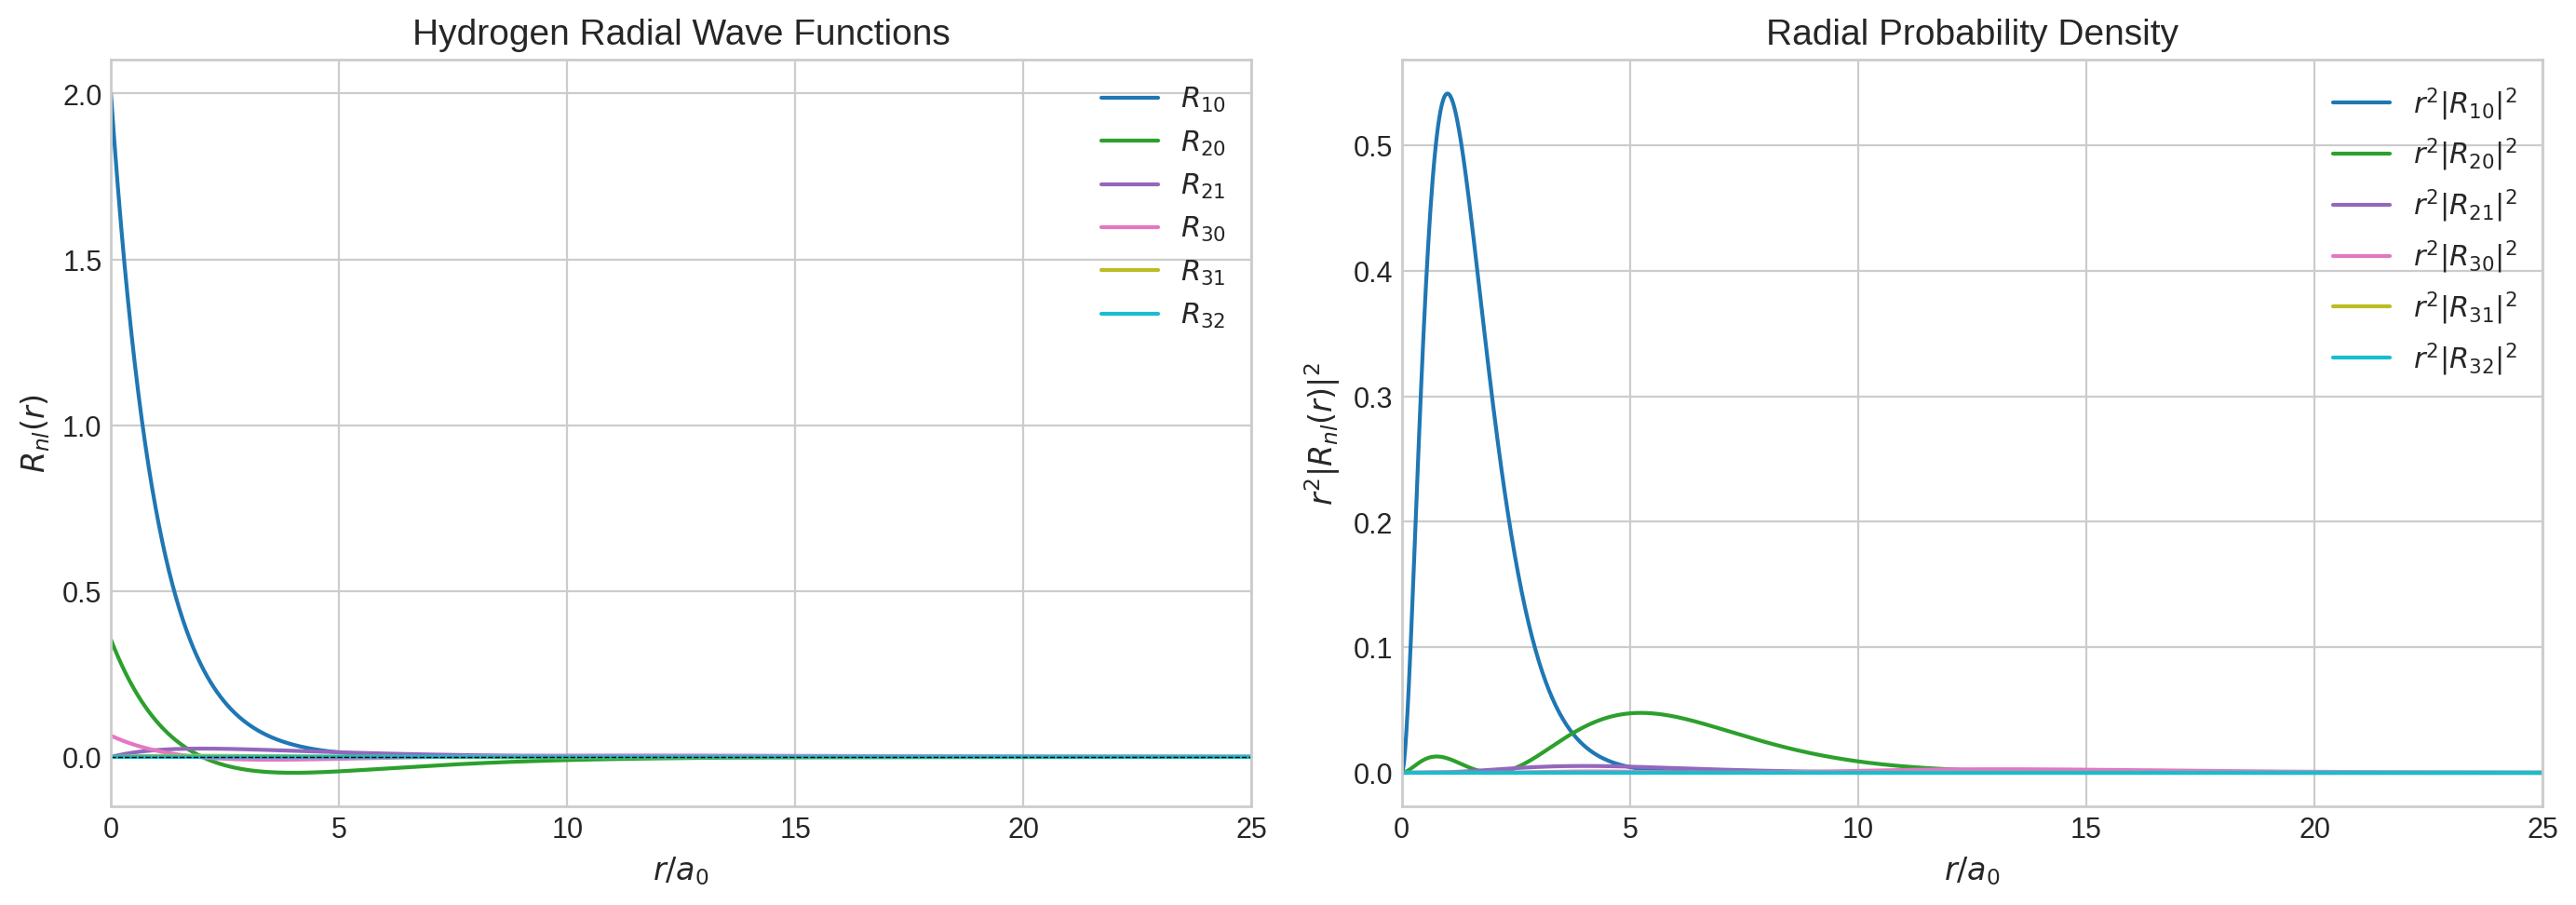

In [5]:
def hydrogen_radial(n, l, r, a0=1):
    """
    Compute the radial wave function R_nl(r) for hydrogen atom.
    
    Parameters:
    -----------
    n : int
        Principal quantum number (n >= 1)
    l : int
        Angular momentum quantum number (0 <= l < n)
    r : array_like
        Radial distance
    a0 : float
        Bohr radius (default=1 for atomic units)
        
    Returns:
    --------
    R_nl : ndarray
        Radial wave function values
    """
    rho = 2 * r / (n * a0)
    
    # Normalization constant
    norm = np.sqrt((2 / (n * a0))**3 * 
                   factorial(n - l - 1, exact=True) / 
                   (2 * n * factorial(n + l, exact=True)**3))
    
    # Associated Laguerre polynomial
    L = eval_genlaguerre(n - l - 1, 2*l + 1, rho)
    
    R = norm * np.exp(-rho/2) * rho**l * L
    
    return R


# Plot radial wave functions and probability densities
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

r = np.linspace(0, 25, 1000)

# Wave functions for different states
states = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]
colors = plt.cm.tab10(np.linspace(0, 1, len(states)))

ax1 = axes[0]
for i, (n, l) in enumerate(states):
    R = hydrogen_radial(n, l, r)
    ax1.plot(r, R, label=f'$R_{{{n}{l}}}$', color=colors[i], linewidth=1.5)

ax1.axhline(y=0, color='k', linewidth=0.5, linestyle='--')
ax1.set_xlabel('$r/a_0$')
ax1.set_ylabel('$R_{nl}(r)$')
ax1.set_title('Hydrogen Radial Wave Functions')
ax1.legend(loc='upper right')
ax1.set_xlim(0, 25)

# Radial probability density r^2 |R_nl|^2
ax2 = axes[1]
for i, (n, l) in enumerate(states):
    R = hydrogen_radial(n, l, r)
    prob = r**2 * R**2
    ax2.plot(r, prob, label=f'$r^2|R_{{{n}{l}}}|^2$', color=colors[i], linewidth=1.5)

ax2.set_xlabel('$r/a_0$')
ax2.set_ylabel('$r^2|R_{nl}(r)|^2$')
ax2.set_title('Radial Probability Density')
ax2.legend(loc='upper right')
ax2.set_xlim(0, 25)

plt.tight_layout()
plt.show()

## Gauss-Laguerre Quadrature

Laguerre polynomials are used in Gauss-Laguerre quadrature for numerical integration over $[0, \infty)$ with weight $e^{-x}$:

$$\int_0^{\infty} e^{-x} f(x) \, dx \approx \sum_{i=1}^{n} w_i f(x_i)$$

where $x_i$ are the roots of $L_n(x)$ and $w_i$ are the corresponding weights.

In [6]:
from numpy.polynomial.laguerre import laggauss

def gauss_laguerre_integrate(f, n_points):
    """
    Integrate f(x) * exp(-x) from 0 to infinity using Gauss-Laguerre quadrature.
    """
    x, w = laggauss(n_points)
    return np.sum(w * f(x))

# Test functions
print("Gauss-Laguerre Quadrature Examples")
print("=" * 50)

# Example 1: Integral of exp(-x) from 0 to inf = 1
# So integral of 1 * exp(-x) = 1
f1 = lambda x: np.ones_like(x)
result1 = gauss_laguerre_integrate(f1, 10)
print(f"\n∫₀^∞ e^(-x) dx = {result1:.10f} (exact: 1)")

# Example 2: Integral of x * exp(-x) = Gamma(2) = 1
f2 = lambda x: x
result2 = gauss_laguerre_integrate(f2, 10)
print(f"∫₀^∞ x·e^(-x) dx = {result2:.10f} (exact: 1)")

# Example 3: Integral of x^4 * exp(-x) = Gamma(5) = 24
f3 = lambda x: x**4
result3 = gauss_laguerre_integrate(f3, 10)
print(f"∫₀^∞ x⁴·e^(-x) dx = {result3:.10f} (exact: 24)")

# Example 4: More complex function
f4 = lambda x: np.sin(x)**2
result4 = gauss_laguerre_integrate(f4, 20)
exact4 = 0.4  # Exact value
print(f"∫₀^∞ sin²(x)·e^(-x) dx = {result4:.10f} (exact: 0.4)")

# Convergence study
print("\n" + "=" * 50)
print("Convergence of Gauss-Laguerre Quadrature")
print("=" * 50)
print("\nTest function: x⁴·e^(-x), exact integral = 24")
print("\n  n     Result         Error")
print("-" * 35)

for n in [2, 3, 4, 5, 10, 15, 20]:
    result = gauss_laguerre_integrate(f3, n)
    error = abs(result - 24)
    print(f"{n:3d}    {result:12.8f}    {error:.2e}")

Gauss-Laguerre Quadrature Examples

∫₀^∞ e^(-x) dx = 1.0000000000 (exact: 1)
∫₀^∞ x·e^(-x) dx = 1.0000000000 (exact: 1)
∫₀^∞ x⁴·e^(-x) dx = 24.0000000000 (exact: 24)
∫₀^∞ sin²(x)·e^(-x) dx = 0.4000014906 (exact: 0.4)

Convergence of Gauss-Laguerre Quadrature

Test function: x⁴·e^(-x), exact integral = 24

  n     Result         Error
-----------------------------------
  2     20.00000000    4.00e+00
  3     24.00000000    3.55e-15
  4     24.00000000    1.78e-14
  5     24.00000000    2.49e-14
 10     24.00000000    7.11e-15
 15     24.00000000    1.99e-13
 20     24.00000000    5.61e-13


## Summary

In this notebook, we explored Laguerre polynomials, covering:

1. **Mathematical foundations**: Rodrigues' formula, explicit representations, and generating functions
2. **Key properties**: Orthogonality, recurrence relations, and differential equations
3. **Computational methods**: Implementation using recurrence and explicit formulas
4. **Visualizations**: Standard and associated Laguerre polynomials, weighted functions, and zeros
5. **Orthogonality verification**: Numerical confirmation of the orthogonality integral
6. **Physical applications**: Hydrogen atom radial wave functions
7. **Numerical methods**: Gauss-Laguerre quadrature for integration

Laguerre polynomials are fundamental in quantum mechanics, signal processing, and numerical analysis, providing elegant solutions to problems involving exponential weights on semi-infinite domains.